In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy
from matplotlib import pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

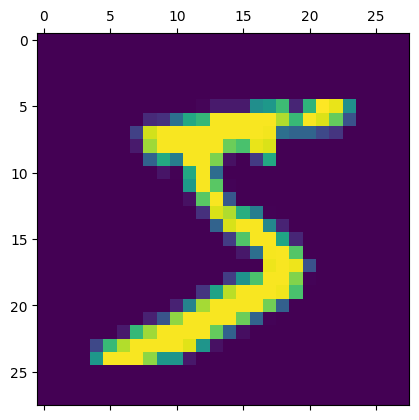

In [13]:
plt.matshow(X_train[0])

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [18]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [23]:
model.fit(X_train, y_train, epochs = 5, batch_size = 30)

Epoch 1/5
2000/2000 [==============================] - 9s 4ms/step - loss: 0.2512 - accuracy: 0.9262
Epoch 2/5
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1046 - accuracy: 0.9682
Epoch 3/5
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0725 - accuracy: 0.9774
Epoch 4/5
2000/2000 [==============================] - 25s 12ms/step - loss: 0.0553 - accuracy: 0.9821
Epoch 5/5
2000/2000 [==============================] - 15s 7ms/step - loss: 0.0433 - accuracy: 0.9859


In [24]:
y_prob = model.predict(X_test)
y_prob

313/313 [==============================] - 1s 2ms/step


array([[9.28958729e-02, 8.53681559e-05, 1.19909115e-01, ...,
        9.99994516e-01, 9.11306008e-04, 1.54980749e-01],
       [4.19142097e-03, 9.61937785e-01, 9.99981940e-01, ...,
        1.12825663e-04, 5.94758727e-02, 2.19550464e-04],
       [4.84734820e-03, 9.99946594e-01, 4.26140368e-01, ...,
        8.80063295e-01, 4.43758905e-01, 5.69155207e-03],
       ...,
       [4.71475162e-03, 3.55511112e-03, 2.42485039e-05, ...,
        9.46354449e-01, 7.44259879e-02, 7.15876102e-01],
       [3.32288668e-02, 3.93213984e-03, 8.93198361e-04, ...,
        6.27366900e-01, 9.70945537e-01, 8.52978264e-04],
       [4.44503486e-01, 1.25529862e-03, 7.43160071e-03, ...,
        8.60087493e-06, 8.39447454e-02, 5.15717864e-01]], dtype=float32)

In [29]:
y_pred = y_prob.argmax(axis = 1)

In [30]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [31]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    1,    0,    0,    2,    0,    1,    2],
       [   0, 1120,    1,    6,    1,    1,    1,    2,    3,    0],
       [   7,    0,  999,   11,    3,    0,    3,    7,    2,    0],
       [   0,    0,    2,  989,    0,    5,    0,    3,    0,   11],
       [   2,    0,    0,    1,  960,    0,    5,    2,    1,   11],
       [   3,    0,    0,    7,    2,  874,    2,    0,    1,    3],
       [   3,    3,    0,    2,    7,    6,  936,    0,    1,    0],
       [   1,    2,    8,    3,    1,    0,    0, 1002,    1,   10],
       [   7,    2,    6,   22,    7,    7,    1,    4,  905,   13],
       [   3,    3,    0,    1,    8,    6,    0,    6,    1,  981]])>

Text(95.72222222222221, 0.5, 'Truth')

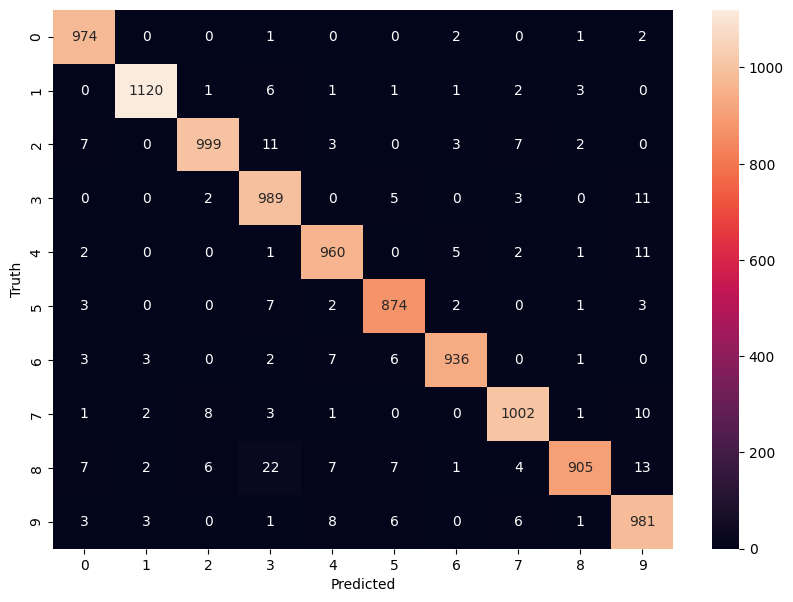

In [34]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')